# Transforms

All TorchVision datasets have two parameters -`transform` to modify the features and `target_transform` to modify the labels - that accept callables containing the transformation logic.

In [1]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

In [ ]:
ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

1. `ToTensor()` :
It converts a PIL image or NumPy ndarray into a FloatTensor. and scales the image’s pixel intensity values in the range [0., 1.]


2. `Lambda` Transforms :
Lambda transforms apply any user-defined lambda function.

Here, we define a function to turn the integer into a one-hot encoded tensor. It first creates a zero tensor of size 10 (the number of labels in our dataset) and calls `scatter_` which assigns a value=1 on the index as given by the label `y`.

In [3]:
target_transform = Lambda(lambda y: torch.zeros(
    10, dtype=torch.float).scatter_(dim=0, index=torch.tensor(y), value=1))

**Example :**

In [12]:
import matplotlib.pyplot as plt

In [4]:
img, label = ds[0]

In [9]:
print("Image size", img.size())
print("Label size", label.size())

Image size torch.Size([1, 28, 28])
Label size torch.Size([10])


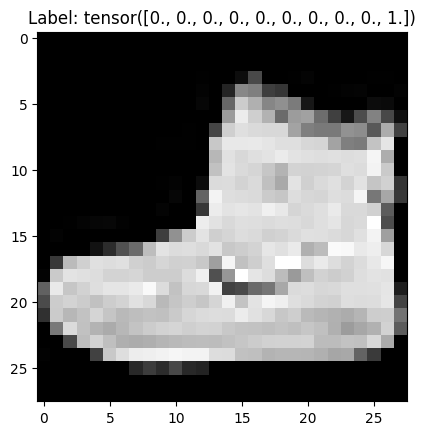

One-hot encoded label: tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])


In [13]:
plt.imshow(img.squeeze(), cmap="gray")
plt.title(f"Label: {label}")
plt.show()

print(f"One-hot encoded label: {label}")